<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-JavyMB/blob/main/A01794423_Actividad7_Regresion_lineal_polinomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tecnológico de Monterrey

## Maestría en Inteligencia Artificial Aplicada

### Ciencia y analítica de datos

**Alumno**: Javier Munoz Barrios

**Matricula**: A01794423

# Linear Models


- In supervised learning, the training data fed to the algorithm includes the desired solutions, called labels. 
- In **regression**, the labels are continuous quantities.
- Linear models predict by computing a weighted sum of input features plus a bias term.

In [12]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
# to make this notebook's output stable across runs
np.random.seed(42)

In [ ]:
5-2

3

## Simple Linear Regression

Simple linear regression equation:

$y = ax + b$
<br>
$a$: slope
<br>
$b$: intercept

Generate linear-looking data with the equation:

$y = 3X + 4 + noise$

In [ ]:
np.random.rand(100, 1)

array([[0.37454012],
       [0.95071431],
       [0.73199394],
       [0.59865848],
       [0.15601864],
       [0.15599452],
       [0.05808361],
       [0.86617615],
       [0.60111501],
       [0.70807258],
       [0.02058449],
       [0.96990985],
       [0.83244264],
       [0.21233911],
       [0.18182497],
       [0.18340451],
       [0.30424224],
       [0.52475643],
       [0.43194502],
       [0.29122914],
       [0.61185289],
       [0.13949386],
       [0.29214465],
       [0.36636184],
       [0.45606998],
       [0.78517596],
       [0.19967378],
       [0.51423444],
       [0.59241457],
       [0.04645041],
       [0.60754485],
       [0.17052412],
       [0.06505159],
       [0.94888554],
       [0.96563203],
       [0.80839735],
       [0.30461377],
       [0.09767211],
       [0.68423303],
       [0.44015249],
       [0.12203823],
       [0.49517691],
       [0.03438852],
       [0.9093204 ],
       [0.25877998],
       [0.66252228],
       [0.31171108],
       [0.520

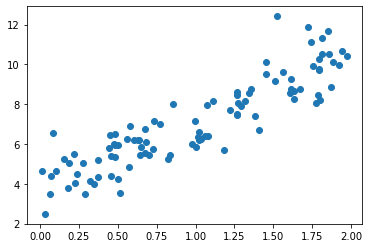

In [ ]:
X = 2*np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X, y);

In [ ]:
import pandas as pd
pd.DataFrame(y)

,0
0,3.508550
1,8.050716
2,6.179208
3,6.337073
4,11.311173
...,...
95,5.441928
96,10.121188
97,9.787643
98,8.061635


In [ ]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X, y)

LinearRegression()

Plot the model's predictions:

In [ ]:
#X_fit[]

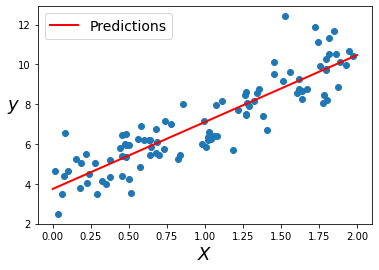

In [ ]:
# construct best fit line
X_fit = np.linspace(0, 2, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

Predictions are a good fit.

Generate new data to make predictions with the model:

In [ ]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [ ]:
X_new.shape

(2, 1)

In [ ]:
y_new = linear_reg.predict(X_new)
y_new

array([[ 3.74406122],
       [10.47517611]])

In [ ]:
 linear_reg.coef_, linear_reg.intercept_

(array([[3.36555744]]), array([3.74406122]))

The model estimates:

$\hat{y} = 3.36X + 3.74$

In [ ]:
#|VENTAS|GANANCIAS|
#COEF*VENTAS+B
#|VENTAS|COMPRAS|GANANCIAS|
#COEF1*X1+COEF2*X2+B=Y

## Polynomial Regression

If data is more complex than a straight line, you can use a linear model ti fit non-linear data adding powers of each feature as new features and then train a linear model on the extended set of features. 

$$y = a_0 + a_1x_1 + a_2x_2 + a_3x_3 + ...$$ to $$y = a_0 + a_1x + a_2x^2 + a_3x^3+ ...$$ 

This is still a linear model, the linearity refers to the fact that the coefficients never multiply or divide each other.

To generate polynomial data we use the function:

$y = 0.50X^2 + X + 2 + noise$

In [ ]:
# generate non-linear data e.g. quadratic equation
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

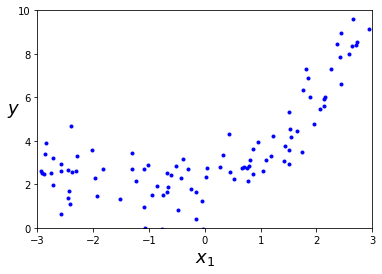

In [ ]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10]);

In [ ]:
import pandas as pd
pd.DataFrame(y)

,0
0,8.529240
1,3.768929
2,3.354423
3,2.747935
4,0.808458
...,...
95,5.346771
96,6.338229
97,3.488785
98,1.372002


Now we can use `PolynomialFeatues` to transform training data adding the square of each feature as new features.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [ ]:
X_poly

array([[ 2.72919168e+00,  7.44848725e+00],
       [ 1.42738150e+00,  2.03741795e+00],
       [ 3.26124315e-01,  1.06357069e-01],
       [ 6.70324477e-01,  4.49334905e-01],
       [-4.82399625e-01,  2.32709399e-01],
       [-1.51361406e+00,  2.29102753e+00],
       [-8.64163928e-01,  7.46779295e-01],
       [ 1.54707666e+00,  2.39344620e+00],
       [-2.91363907e+00,  8.48929262e+00],
       [-2.30356416e+00,  5.30640783e+00],
       [-2.72398415e+00,  7.42008964e+00],
       [-2.75562719e+00,  7.59348119e+00],
       [ 2.13276350e+00,  4.54868016e+00],
       [ 1.22194716e+00,  1.49315485e+00],
       [-1.54957025e-01,  2.40116797e-02],
       [-2.41299504e+00,  5.82254504e+00],
       [-5.03047493e-02,  2.53056780e-03],
       [-1.59169375e-01,  2.53348900e-02],
       [-1.96078878e+00,  3.84469264e+00],
       [-3.96890105e-01,  1.57521755e-01],
       [-6.08971594e-01,  3.70846402e-01],
       [ 6.95100588e-01,  4.83164828e-01],
       [ 8.10561905e-01,  6.57010602e-01],
       [-2.

`X_poly` now contains the original feature of X plus the square of the feature:

In [ ]:
print(X[0])
print(X[0]*X[0])


[2.72919168]
[7.44848725]


In [ ]:
X_poly[0]

array([2.72919168, 7.44848725])

Fit the model to this extended training data:

In [ ]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y)
lin_reg.coef_, lin_reg.intercept_

(array([[1.04271531, 0.50866711]]), array([2.01873554]))

The model estimates:

$\hat{y} =  0.89X +0.48X^2 + 2.09$

Plot the data and the predictions:

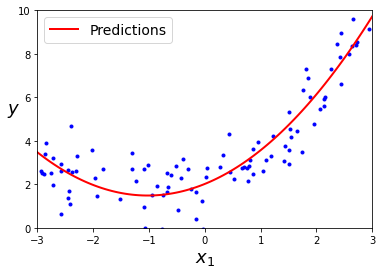

In [ ]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10]);

## R square

R² es una medida estadística de qué tan cerca están los datos de la línea de regresión ajustada. También se conoce como el coeficiente de determinación o el coeficiente de determinación múltiple para la regresión múltiple. Para decirlo en un lenguaje más simple, R² es una medida de ajuste para los modelos de regresión lineal.



R² no indica si un modelo de regresión se ajusta adecuadamente a sus datos. Un buen modelo puede tener un valor R² bajo. Por otro lado, un modelo sesgado puede tener un valor alto de R².

 SSres + SSreg = SStot, R² = Explained variation / Total Variation
 
 ![image.png](https://i.stack.imgur.com/xb1VY.png)
 
![image.png](https://3.bp.blogspot.com/-MFqQLwbGwd4/WMO7tz39beI/AAAAAAAAF9I/Bjpfohgv_5E4lu7HzHJBQtXsBM--byqPwCLcB/s1600/rsquared.png)


# Ejercicio 1

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
711,5.200223,36.200499
706,5.193377,35.236973
267,3.667762,40.926115
23,1.815917,69.178731
971,7.107061,36.082433
669,5.049712,41.333781
534,4.544952,46.423561
33,1.987770,62.596005
286,3.737880,40.800063
523,4.524484,38.219681


In [ ]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

In [ ]:
len(X)

1000

In [ ]:
y.describe

<bound method NDFrame.describe of 0      95.066056
1      96.531750
2      73.661311
3      95.566843
4      98.777013
         ...    
995    23.855067
996    27.536542
997    25.973787
998    25.138311
999    21.547777
Name: Manufacturing Cost, Length: 1000, dtype: float64>

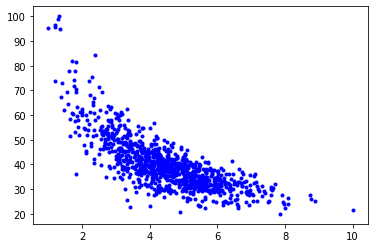

In [ ]:
plt.plot(X,y,'b.')

#### 1- Divide los datos del costo de manufactura. Utiliza la función train_test_split

In [ ]:
# Conjunto de entrenamiento 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 101)


In [ ]:
def get_errors(y,ypred):
  MAE, RMSE,R2 = metrics.mean_absolute_error(y, ypred), np.sqrt(metrics.mean_squared_error(y, ypred)), r2_score(y, ypred)
  return  MAE, RMSE,R2

error_list=list()

#### 2- **Regresión** Lineal.
- Realiza la regresión lineal: modelo generado (ecuación), su visualización, sus errores y r cuadrada.


In [ ]:
#Regresion lineal
linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X, y)
y_pred = linear_reg.predict(X)


In [ ]:
#Ecuacion
linear_reg.coef_, linear_reg.intercept_

(array([-6.0333683]), 67.03904193389238)

El modelo estima 

$\hat{y} = -6.03X + 67.03$

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


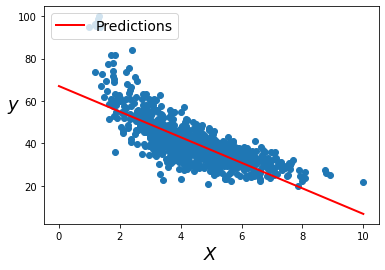

In [ ]:
# Visualizacion
X_fit = np.linspace(0, 10, 1000)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])
plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

In [ ]:
print('*'*20,'Lineal','*'*20)
MAE_LR, RMSE_LR,R2_LR = get_errors(y, y_pred)
print('Error medio Absoluto (MAE):',MAE_LR)
print('Root Mean Squared Error:   ', RMSE_LR)
print('r2_score:                  ',R2_LR)
error_list.append(('R. Lineal',MAE_LR, RMSE_LR,R2_LR))

******************** Lineal ********************
Error medio Absoluto (MAE): 4.921245677483368
Root Mean Squared Error:    6.871474273023592
r2_score:                   0.5789767558506287


#### 3- **Regresión** Polinomial.
- Realiza la  regresión polinomial completa, tu modelo generado (ecuación), su visualización, sus errores y r cuadrada.


In [ ]:
#polinomial
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly_features.fit_transform(X)

lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y)
lin_reg.coef_, lin_reg.intercept_

X_new=np.linspace(0, 10, 1000).reshape(1000, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
lin_reg.coef_, lin_reg.intercept_

(array([-33.07899652,   4.8291037 ,  -0.2510852 ]), 111.37391640559878)

$\hat{y} =  -16.82X +1.17X^2  + -1.29X +5.12X^2+ 131.71$

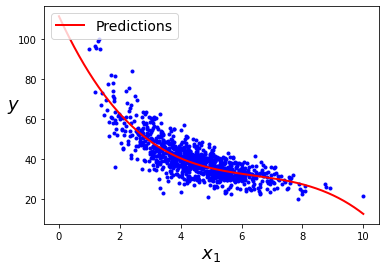

In [ ]:
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)

Nota: Grados altos tienden al overfiting ,es por eso que selecionamos un grado 2. 

In [ ]:
print('*'*20,'Polinomial','*'*20)

MAE_P, RMSE_P,R2_P = get_errors(y, y_new)
print('Error medio Absoluto (MAE):',MAE_P)
print('Root Mean Squared Error:   ', RMSE_P)
print('r2_score:                  ',R2_P)
error_list.append(('Polinomial',MAE_P, RMSE_P,R2_P ))

******************** Polinomial ********************
Error medio Absoluto (MAE): 12.071947795352493
Root Mean Squared Error:    16.66171647772551
r2_score:                   -1.4754018081179328


### 4- Realiza la regresión con Ridge y Lasso. Incluye la ecuación de tu modelo, visualización , errores y r cuadrada.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge


model_ridge = Pipeline([("poly_features", PolynomialFeatures(degree=3, include_bias=False)),
                  ("scaler", StandardScaler()),
                  ("ridge", Ridge(alpha = 0.001, solver = 'cholesky', random_state = 42))])
model_ridge.fit(X_train, y_train)
y_pred_ridge = model_ridge.predict(X)

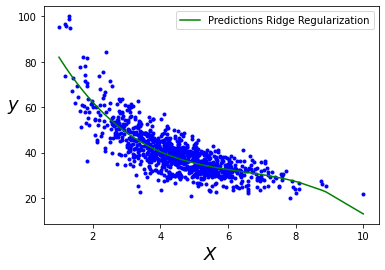

In [ ]:
#Visualizacion
plt.plot(X, y, "b.")
plt.plot(X, y_pred_ridge, "g-",label="Predictions Ridge Regularization")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper right", fontsize=10)

In [ ]:
print('*'*20,'Ridge','*'*20)
MAE_L2, RMSE_L2,R2_L2 = get_errors(y, y_pred_ridge)
print('Error medio Absoluto (MAE):',MAE_L2)
print('Root Mean Squared Error:   ', RMSE_L2)
print('r2_score:                  ',R2_L2)
error_list.append(('Ridge',MAE_L2, RMSE_L2,R2_L2))

******************** Ridge ********************
Error medio Absoluto (MAE): 4.462197750600671
Root Mean Squared Error:    5.922995222641911
r2_score:                   0.6871839783836635


##### Lasso


In [ ]:
from sklearn.linear_model import Lasso

model_lasso = Pipeline([("poly_features", PolynomialFeatures(degree=3, include_bias=False)),
                        ("scaler", StandardScaler()),
                        ("lasso", Lasso(alpha = 0.001, random_state = 42))])
model_lasso.fit(X, y)
lasso_y_pred = model_lasso.predict(X)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.440e+04, tolerance: 1.121e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


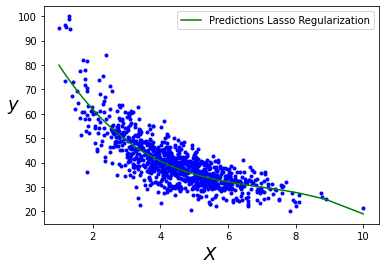

In [ ]:
plt.plot(X, y, "b.")
plt.plot(X, lasso_y_pred, "g-",label="Predictions Lasso Regularization")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper right", fontsize=10);

In [ ]:
print('*'*20,'Lasso','*'*20)
MAE_L1, RMSE_L1,R2_L1 = get_errors(y, lasso_y_pred)
print('Error medio Absoluto (MAE):',MAE_L1)
print('Root Mean Squared Error:   ', RMSE_L1)
print('r2_score:                  ',R2_L1)
error_list.append(('Lasso',MAE_L1, RMSE_L1,R2_L1))

******************** Lasso ********************
Error medio Absoluto (MAE): 4.449490611193992
Root Mean Squared Error:    5.939401507403646
r2_score:                   0.6854486210575197


#### 5- Finalmente grafica :
- MAE (de los cuatro métodos)
- R2 (de los cuatro métodos)

In [ ]:
pd.DataFrame(error_list,columns=['Modelo','MAE','RMSE','R2'])

,Modelo,MAE,RMSE,R2
0,R. Lineal,4.921246,6.871474,0.578977
1,Polinomial,12.071948,16.661716,-1.475402
2,Ridge,4.462198,5.922995,0.687184
3,Lasso,4.449491,5.939402,0.685449


## Conclusiones 

Explica tus resultados, que método conviene más a la empresa, ¿por que?, 


¿que porcentajes de entrenamiento y evaluación usaste?

- Estamos usando un 85% de entrenamiento y 15% de validacion.

¿que error tienes?, ¿es bueno?, ¿cómo lo sabes?

#Ejercicio 2
Realiza la regresión polinomial de los siguientes datos:

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression



In [34]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
735,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,...,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
2830,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,...,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
4106,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,...,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
16218,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,...,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
19964,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,...,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050
1227,1761300310,20140827T000000,211000.0,4,2.00,1710,8288,1.5,0,0,...,7,1710,0,1970,0,98031,47.3947,-122.174,1710,7200
18849,7732410120,20140819T000000,790000.0,4,2.50,2690,8036,2.0,0,0,...,9,2690,0,1987,0,98007,47.6596,-122.144,2420,8087
19369,7010701383,20141017T000000,680000.0,3,2.50,1800,4400,1.0,0,0,...,7,1350,450,1970,0,98199,47.6599,-122.396,1920,4400
20164,291310170,20140804T000000,384500.0,3,2.50,1600,2610,2.0,0,0,...,8,1600,0,2005,0,98027,47.5344,-122.068,1445,1288
7139,4232901990,20140516T000000,605000.0,2,1.00,910,3600,1.0,0,0,...,7,910,0,1909,0,98119,47.6341,-122.361,1720,3600


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [36]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [37]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)


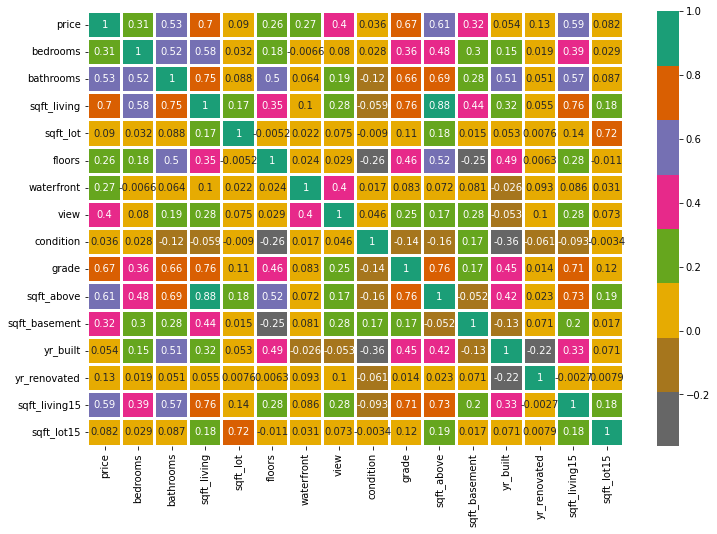

In [38]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [39]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y = df[label]

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)} {len(y)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 21613 21613
**************************************************
Numero total de registros en el training set: 19451
Tamaño de X_train: (19451, 15)
**************************************************
Mumero total de registros en el test dataset: 2162
Tamaño del X_test: (2162, 15)


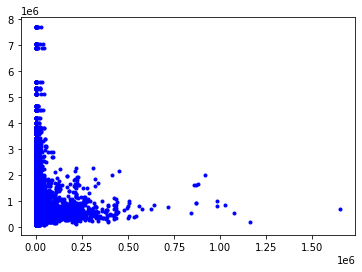

In [19]:

plt.plot(X,y,'b.')

#### 1- Regresión Múltiple Lineal.
- Realiza la regresión lineal: modelo generado (ecuación), sus errores y r cuadrada.


In [20]:
from sklearn.linear_model import LinearRegression

alinear_reg = LinearRegression(fit_intercept=True)
y_fit_lr = alinear_reg.fit(X_train, y_train)
y_pred_lr = alinear_reg.predict(X_test)

In [21]:
#Ecuacion
alinear_reg.coef_, alinear_reg.intercept_

(array([[-3.82008048e+04,  4.14661380e+04,  1.07992584e+02,
          1.71356997e-02,  3.16916913e+04,  5.52691023e+05,
          4.12493228e+04,  2.12221443e+04,  1.19493216e+05,
          4.77750271e+01,  6.02175565e+01, -3.55090216e+03,
          1.32602215e+01,  2.90059284e+01, -5.48132603e-01]]),
 array([6151359.2627409]))

El modelo estima 

$\hat{y} = -38200.80X + 41466.14X + 107.99X + 0.02X + 31691.69X + 552691.02X + 41249.32X + 21222.14X + 119493.22X + 47.78X + 60.22X + -3550.90X + 13.26X + 29.01X + -0.55X + 4.14$